In [1]:
# %%
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# %%
cifar_10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()

# %%
# Code here!

In [2]:
train_images.shape

(50000, 32, 32, 3)

In [3]:
len(train_labels)

50000

In [4]:
type(train_labels)

numpy.ndarray

In [5]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

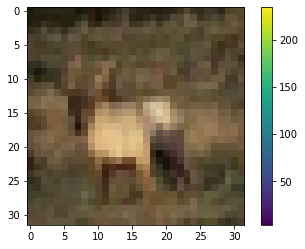

In [6]:
# %%
# 画张图看看
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

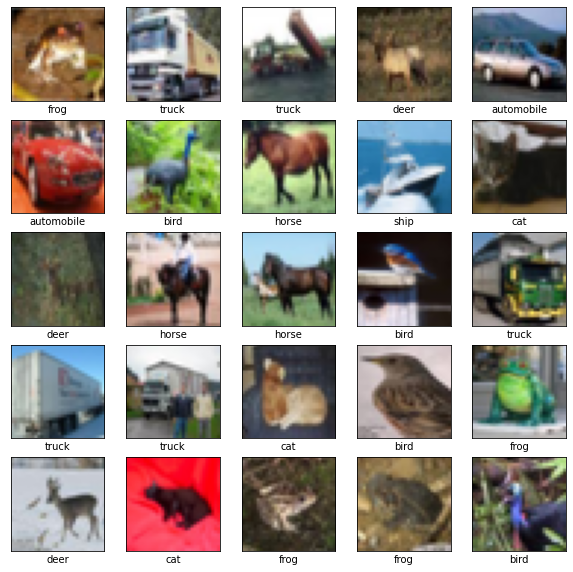

In [8]:
# %%
# 像素归一化，归一化后的像素范围为[0, 1]
train_images = train_images / 255.0

test_images = test_images / 255.0
# %%
# 肉眼可见图变灰了
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()


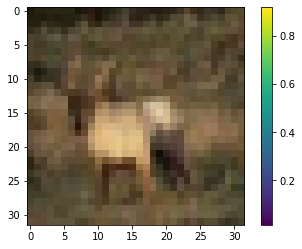

In [9]:
# %%
# 画张图看看
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# 神经网络搭建
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)), #效果上找出最明显特征
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
# %%
# 编译模型
# 优化器选择adam（不知道选啥的时候用adam就完事了）
# 损失函数选用SparseCategoricalCrossentropy
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# %%
# fit模型，开始训练啦！
cnn_model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5421 - accuracy: 0.4368
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1834 - accuracy: 0.5827
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0477 - accuracy: 0.6311
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9488 - accuracy: 0.6678
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8772 - accuracy: 0.6914
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8175 - accuracy: 0.7144
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7690 - accuracy: 0.7310
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7257 - accuracy: 0.7469
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6867 - accuracy: 0.7602
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [13]:
# %%
# 测试模型
test_loss, test_acc = cnn_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
# %%
# 这里直接接一个softmax把输出转化成概率
probability_model = tf.keras.Sequential([cnn_model, 
                                         tf.keras.layers.Softmax()])
# %%
predictions = probability_model.predict(test_images)
# %%
predictions[0]
# %%
# argmax把输出最大概率的元素，得到结果
np.argmax(predictions[0])
# %%
test_labels[0]
# %%

313/313 - 2s - loss: 0.8525 - accuracy: 0.7164 - 2s/epoch - 5ms/step

Test accuracy: 0.7164000272750854
313/313 [==============================] - 2s 5ms/step


array([3], dtype=uint8)

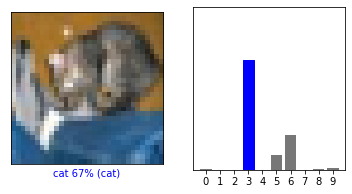

In [16]:
# 下面都是可视化，感兴趣的自己看看
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')
# %%
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


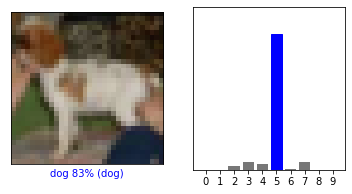

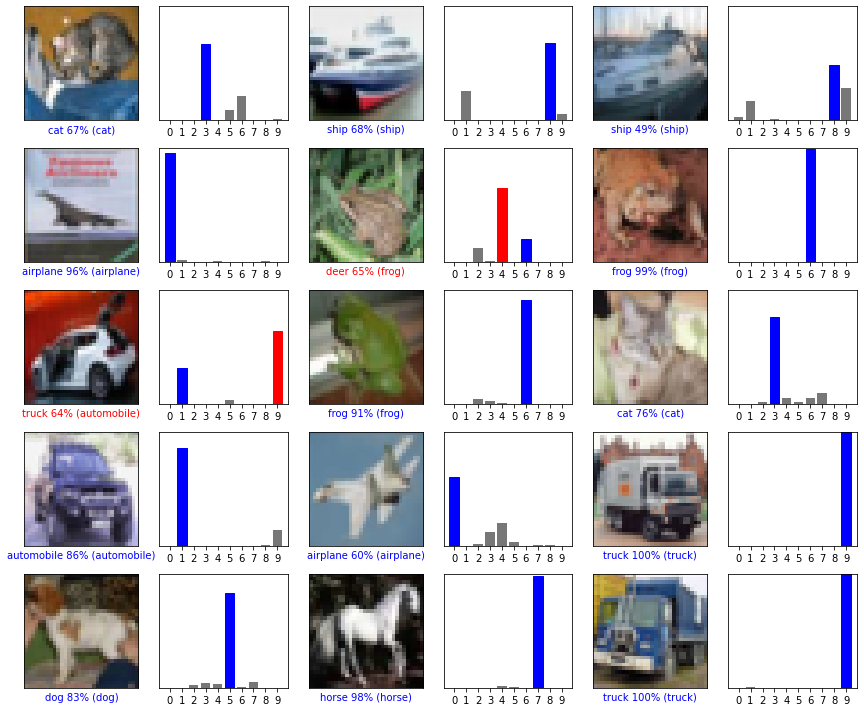

In [17]:
# %%
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
# %%
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
# %%
